In [1]:
from directed_graphs.datasets import directed_circle, directed_cylinder, directed_spiral, directed_swiss_roll, directed_spiral_uniform, directed_swiss_roll_uniform
from directed_graphs.datasets import plot_directed_2d, plot_directed_3d
from directed_graphs.diffusion_flow_embedding import DiffusionFlowEmbedder
import torch
import numpy as np

In [2]:
if torch.__version__[:4] == "1.13":
	# device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

else:
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

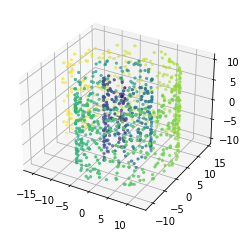

In [3]:
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [4]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

  0%|          | 0/2000 [00:00<?, ?it/s]/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/gpfs/ysm/project/sumry2022/sumry2022_gt392/directed_graphs/directed_graphs/diffusion_flow_embedding.py:166: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2318.)
  x_smoothness = (x_vecs.T @ L @ x_vec

EPOCH 0. Loss 421.68096923828125. Flow strength 4.999989986419678. Weight of flow 0.5 Heatmap of P embedding is 


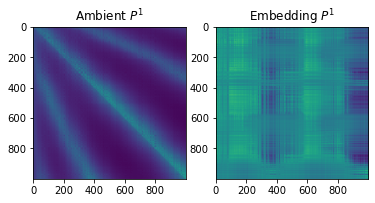

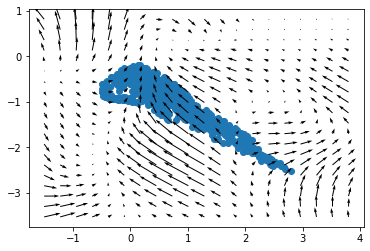

  5%|▌         | 100/2000 [00:31<09:20,  3.39it/s]

EPOCH 100. Loss 415.59991455078125. Flow strength 4.998988628387451. Weight of flow 0.5 Heatmap of P embedding is 


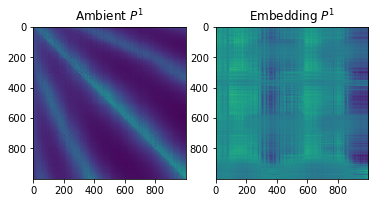

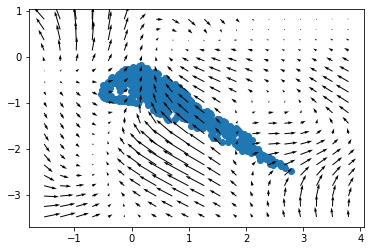

 10%|█         | 200/2000 [00:58<06:39,  4.50it/s]

EPOCH 200. Loss 408.6295471191406. Flow strength 4.998018741607666. Weight of flow 0.5 Heatmap of P embedding is 


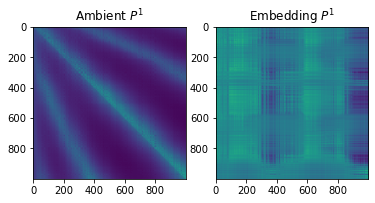

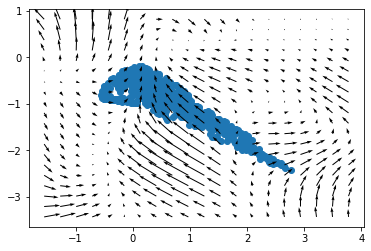

 15%|█▌        | 300/2000 [01:25<08:18,  3.41it/s]

EPOCH 300. Loss 396.6046142578125. Flow strength 4.99706506729126. Weight of flow 0.5 Heatmap of P embedding is 


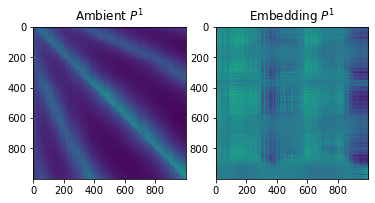

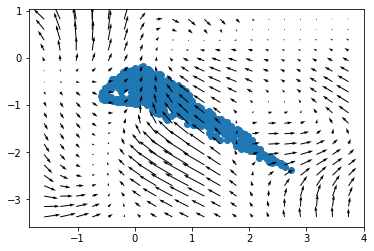

 20%|██        | 400/2000 [01:51<05:53,  4.52it/s]

EPOCH 400. Loss 385.8810119628906. Flow strength 4.9961113929748535. Weight of flow 0.5 Heatmap of P embedding is 


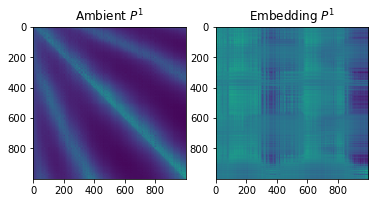

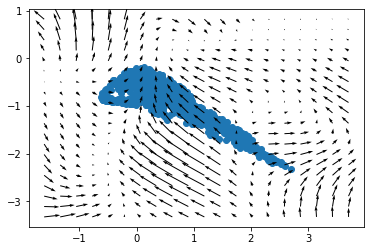

 25%|██▌       | 500/2000 [02:15<05:32,  4.51it/s]

EPOCH 500. Loss 376.1230163574219. Flow strength 4.995179176330566. Weight of flow 0.5 Heatmap of P embedding is 


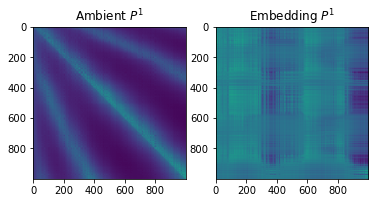

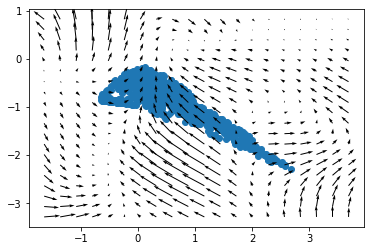

 30%|███       | 600/2000 [02:38<05:10,  4.50it/s]

EPOCH 600. Loss 364.9518127441406. Flow strength 4.9942731857299805. Weight of flow 0.5 Heatmap of P embedding is 


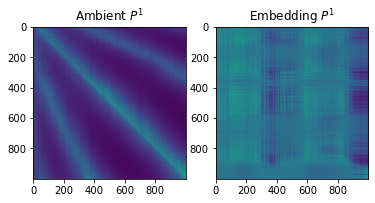

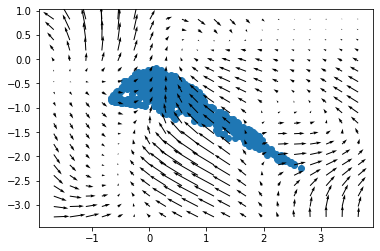

 35%|███▌      | 700/2000 [03:02<04:48,  4.51it/s]

EPOCH 700. Loss 355.7324523925781. Flow strength 4.9933671951293945. Weight of flow 0.5 Heatmap of P embedding is 


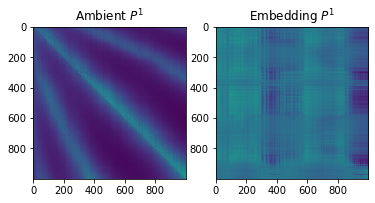

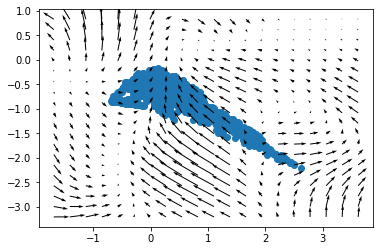

 40%|████      | 800/2000 [03:25<04:25,  4.53it/s]

EPOCH 800. Loss 346.02423095703125. Flow strength 4.992461204528809. Weight of flow 0.5 Heatmap of P embedding is 


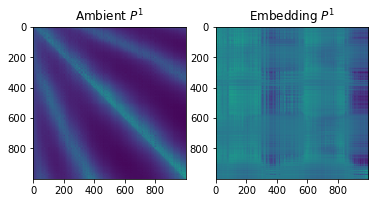

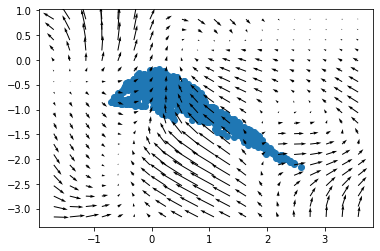

 45%|████▌     | 900/2000 [03:49<04:03,  4.52it/s]

EPOCH 900. Loss 335.8870544433594. Flow strength 4.991555213928223. Weight of flow 0.5 Heatmap of P embedding is 


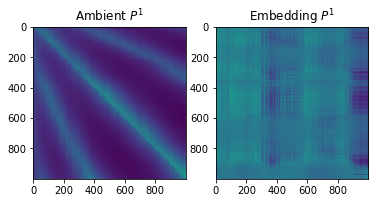

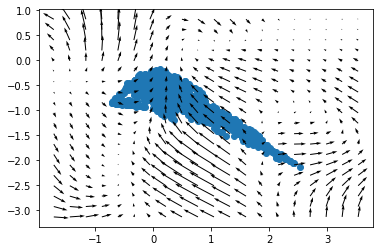

 50%|█████     | 1000/2000 [04:15<04:53,  3.41it/s]

EPOCH 1000. Loss 324.6943664550781. Flow strength 4.990649223327637. Weight of flow 0.5 Heatmap of P embedding is 


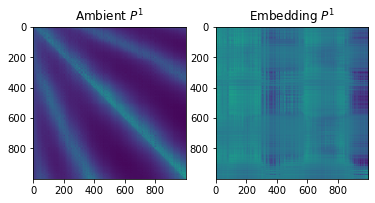

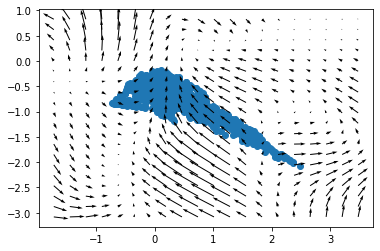

 53%|█████▎    | 1057/2000 [04:33<04:38,  3.38it/s]

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=15,sigma_embedding=15,device=device, learning_rate = 1e-3)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

In [ ]:
dfe.visualize_points(labels)